## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.



## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
df1.describe().transpose()
#df.head(n=20)
#df.tail()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [ ]:
df1.head(n=20)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


## 1.1: Clustering Algorithm # Hierarchy

In [ ]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from sklearn.model_selection import GridSearchCV





In [ ]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [ ]:
#Select two features
X = df1.copy()
X = X.drop(['Age','Savings'], axis=1)
X.head(10)



,Income,SpendingScore
0,77769,0.791329
1,81799,0.791082
2,74751,0.702657
3,74373,0.765680
4,17760,0.348778
5,131578,0.847034
6,76500,0.785198
7,42592,0.355290
8,34384,0.324719
9,27693,0.367063


In [ ]:
#Normalize the data

scaler = StandardScaler()
features = ['Income', 'SpendingScore']
X[features] = scaler.fit_transform(X[features])



In [ ]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

(505, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         505 non-null    float64
 1   SpendingScore  505 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


,count,mean,std,min,25%,50%,75%,max
Income,505.0,-2.814031e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-2.814031e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103


,Income,SpendingScore
0,0.062733,1.103593
1,0.174811,1.102641
2,-0.021200,0.761727
3,-0.031712,1.004705
4,-1.606165,-0.602619
5,1.559204,1.318359
6,0.027441,1.079955
7,-0.915567,-0.577512
8,-1.143838,-0.695375
9,-1.329920,-0.532121


,Income,SpendingScore
500,0.714535,-0.453557
501,-1.545704,-1.164109
502,-1.118447,-0.578054
503,-1.524929,-0.579866
504,-1.258335,-0.831890


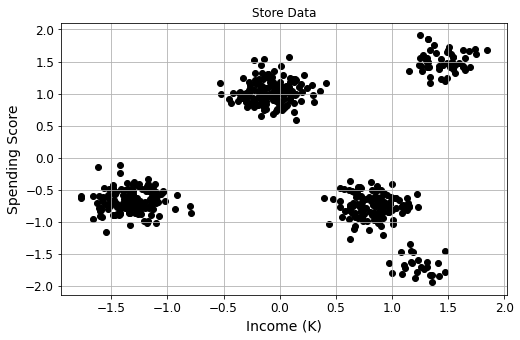

In [ ]:
#Plot the data

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c="black");
plt.title("Store Data");
plt.xlabel('Income (K)');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();



In [ ]:
#Hierarchical (Agglomerative)

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
agg.labels_

array([0, 0, 0, 0, 2, 3, 0, 2, 2, 2, 4, 1, 1, 1, 0, 4, 0, 2, 2, 4, 1, 4,
       0, 2, 4, 3, 3, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 3, 0,
       0, 3, 4, 3, 1, 0, 2, 1, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 3, 3, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 3, 2, 0, 3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 3, 2, 1, 2, 2, 2, 1, 4, 0, 2, 0, 0, 1, 0,
       1, 0, 3, 2, 4, 3, 0, 1, 2, 0, 0, 3, 0, 3, 0, 4, 0, 2, 0, 1, 2, 0,
       2, 4, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 1, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 3, 1,
       2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 1, 3, 1, 2,
       0, 0, 1, 2, 1, 3, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 3, 0,
       0, 0, 4, 0, 1, 2, 3, 3, 3, 2, 0, 1, 2, 2, 1, 1, 0, 0, 4, 0, 0, 2,
       0, 2, 1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 4, 1, 2,
       2, 1, 4, 2, 2, 3, 0, 1, 1, 0, 1, 2, 2, 1, 0,

In [ ]:
silhouette_score(X, agg.labels_)

0.7884539771968492

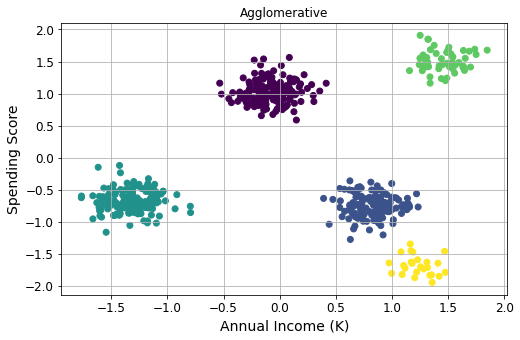

In [ ]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

In [ ]:
#Light green-Target personas
#Pale green-Sensible personas
#Black-Careless personas
#Blue-Standard personas
#Yellow-Frugal personas

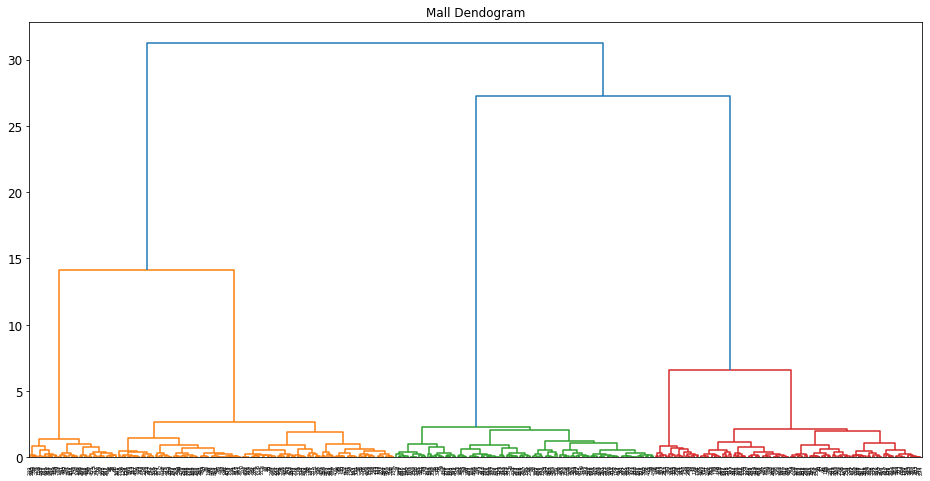

In [ ]:
#Dendograms, Linkages, and Distance Metrics

import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 



In [ ]:
#Explanation
#Using this Dendrogram, I will now determine the optimal number of clusters for our model. For this, we will find the maximum vertical distance that does not cut any horizontal bar.
#Between 5 and 10 on the spending score there is a combination of 5 lines are not joined on the Y-axis.
#So, the optimal number of clusters will be 5 for hierarchical clustering. 


In [ ]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

In [ ]:
#1.1: Clustering Algorithm #1


## 1.1: Clustering Algorithm #2-KMEANS

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
# Let's look at the centers
k_means.cluster_centers_

array([[ 0.82744102, -0.75240648],
       [-0.08524639,  1.02721559],
       [-1.32510593, -0.67963841],
       [ 1.46050665,  1.51057952],
       [ 1.23565419, -1.68367042]])

In [ ]:
#Internal Validation Metrics

# WCSS == Inertia
k_means.inertia_

29.794701197064274

In [ ]:
silhouette_score(X, k_means.labels_)

0.7884539771968492

In [ ]:
#Look at Individual Silhouette Scores

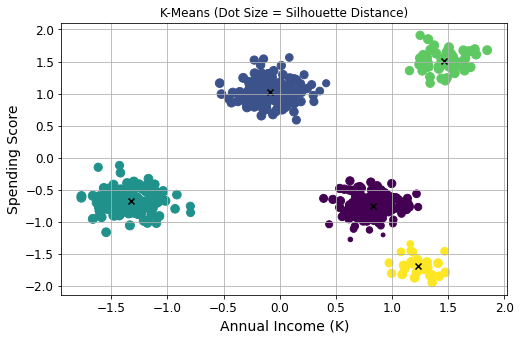

In [ ]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

In [ ]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Income,SpendingScore,Cluster ID,Silhouette
392,0.921586,-1.205734,0,0.147712
299,0.629962,-1.275991,0,0.206919
446,0.800164,-1.128563,0,0.412166
168,1.009524,-1.028770,0,0.454847
288,1.163428,-1.347032,4,0.456165


,Income,SpendingScore,Cluster ID,Silhouette
464,-1.329586,-0.677416,2,0.896198
335,-1.350862,-0.690416,2,0.897004
375,-1.338514,-0.738062,2,0.897094
272,-1.365212,-0.715925,2,0.897157
265,-1.344493,-0.736033,2,0.897206


In [ ]:
#Intepretting the Clusters

# In the case of K-Means, the cluster centers *are* the feature means - that's how K-Means is defined! Sweet!
scaler.inverse_transform(k_means.cluster_centers_)

array([[1.05265810e+05, 3.09926130e-01],
       [7.24480637e+04, 7.71518368e-01],
       [2.78661020e+04, 3.28800461e-01],
       [1.28029120e+05, 8.96891640e-01],
       [1.19944040e+05, 6.83780993e-02]])

In [ ]:
# Let's look at some example rows in each.
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label].head()))


Cluster 0:
[[9.97800000e+04 2.65432607e-01]
 [9.99490000e+04 3.44679224e-01]
 [1.07963000e+05 2.90508633e-01]
 [1.01073000e+05 3.14387120e-01]
 [1.01058000e+05 3.15081550e-01]]

Cluster 1:
[[7.77690000e+04 7.91328777e-01]
 [8.17990000e+04 7.91082047e-01]
 [7.47510000e+04 7.02656952e-01]
 [7.43730000e+04 7.65679562e-01]
 [7.65000000e+04 7.85197850e-01]]

Cluster 2:
[[1.77600000e+04 3.48777548e-01]
 [4.25920000e+04 3.55289682e-01]
 [3.43840000e+04 3.24718682e-01]
 [2.76930000e+04 3.67062973e-01]
 [3.14810000e+04 3.17423971e-01]]

Cluster 3:
[[1.31578000e+05 8.47034103e-01]
 [1.22788000e+05 8.72872406e-01]
 [1.34966000e+05 9.07242175e-01]
 [1.29142000e+05 8.87051994e-01]
 [1.30813000e+05 8.90891247e-01]]

Cluster 4:
[[1.11389000e+05 3.67953622e-02]
 [1.22879000e+05 6.07240352e-02]
 [1.20678000e+05 6.32728513e-02]
 [1.22696000e+05 8.21868319e-02]
 [1.19697000e+05 9.16792017e-02]]


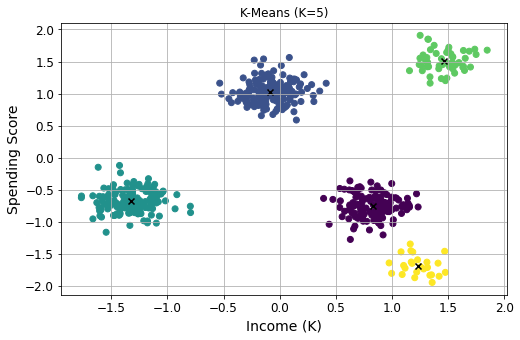

In [ ]:
#Plot the Instances with Color=Cluster ID

plt.figure();
sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 1],  c=k_means.labels_);
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black");
plt.title("K-Means (K=5)");
plt.xlabel('Income (K)');
plt.ylabel('Spending Score');


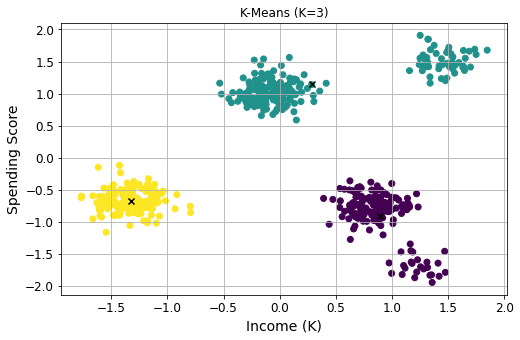

K=3, WCSS=150.83, Sil=0.74


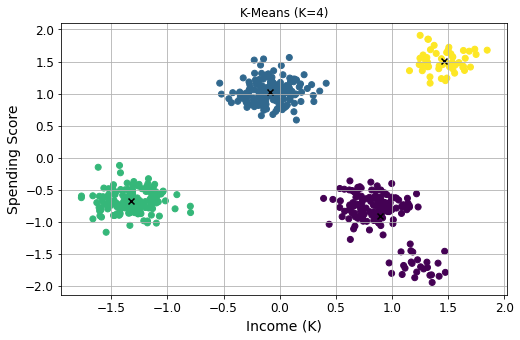

K=4, WCSS=51.36, Sil=0.81


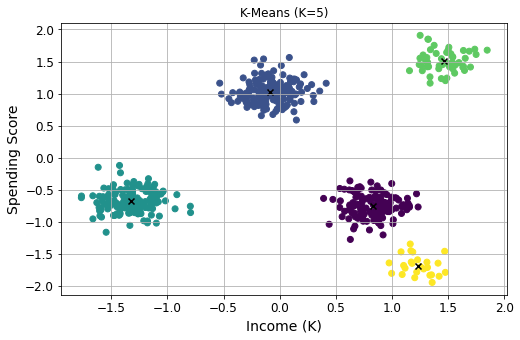

K=5, WCSS=29.79, Sil=0.79


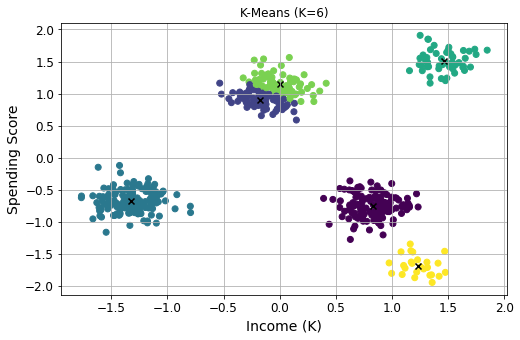

K=6, WCSS=26.10, Sil=0.64


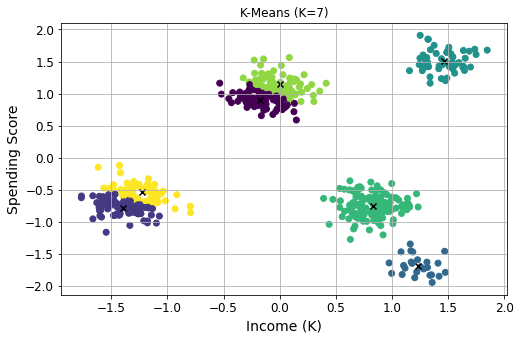

K=7, WCSS=22.98, Sil=0.50


In [ ]:
#Hyperparameter Tuning

def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

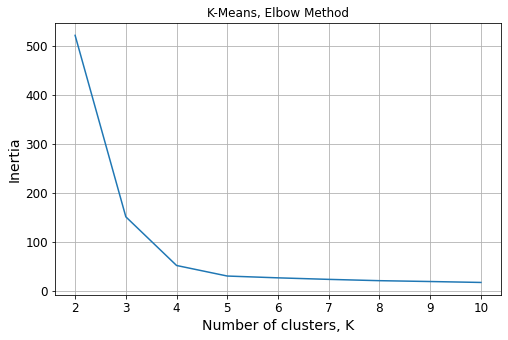

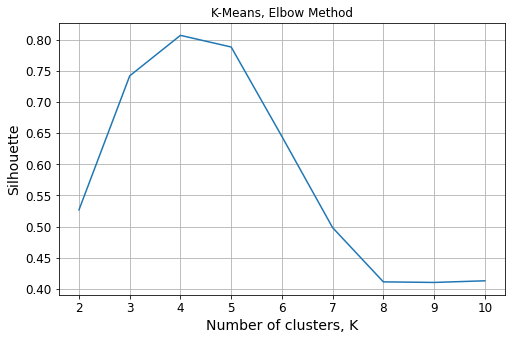

In [ ]:
#Elbow method

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");



In [ ]:
#The optimal number of clusters should be 4
#Best model after tuning K=4, WCSS=51.36, Sil=0.81

#Light green-Sensible personas
#Black-Frugal personas
#Blue- Careless personas
#Yellow-Target personas

## 1.3 Model Comparison

Both models are good in my opinion as we clearly distinct clusters which we can target for our promotions and sales.

When using  hierachical for this dataset we have five clusters compared to the four we have with K Means.

K means has better quality results as it gives us opportunity to easily tune parameters and improve the silhouette score. Also it is fast to use and inteprete using the different graphs we develop in the analysis

For this specific dataset, K Mean also gives us a silhouette_score of 0.81 with hierarchical giving us a score of 0.78 which concludes why I will take K Means